In [68]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [69]:
import numpy as np
import pandas as pd

In [70]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [71]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [72]:
# Create an engine that can talk to the database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [73]:
# reflect an existing database into a new model
# pass in database connection, and use it to prepare my base class
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [74]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [75]:
# Create our session (link) from Python to the DB
# Create a session 
session = Session(engine)

In [76]:
conn = engine.connect()
data = engine.execute("SELECT * FROM station;")

for record in data: 
    print(record)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [135]:
data_msmt = pd.read_sql("SELECT * FROM measurement", conn)
data_msmt.head()


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [133]:
data_station = pd.read_sql("SELECT * FROM station", conn)
data_station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [79]:
# Inspect the data
Station.__table__.columns.values()

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [80]:
Measurement.__table__.columns.values()

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [81]:


# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11a0203c8>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [82]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11a020da0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [83]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [84]:
columns = inspector.get_columns('station')
for column in columns: 
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [85]:
columns = inspector.get_columns('measurement')
for column in columns: 
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [86]:
session.query(Measurement.date).all()

[('2010-01-01'),
 ('2010-01-02'),
 ('2010-01-03'),
 ('2010-01-04'),
 ('2010-01-06'),
 ('2010-01-07'),
 ('2010-01-08'),
 ('2010-01-09'),
 ('2010-01-10'),
 ('2010-01-11'),
 ('2010-01-12'),
 ('2010-01-14'),
 ('2010-01-15'),
 ('2010-01-16'),
 ('2010-01-17'),
 ('2010-01-18'),
 ('2010-01-19'),
 ('2010-01-20'),
 ('2010-01-21'),
 ('2010-01-22'),
 ('2010-01-23'),
 ('2010-01-24'),
 ('2010-01-25'),
 ('2010-01-26'),
 ('2010-01-27'),
 ('2010-01-28'),
 ('2010-01-30'),
 ('2010-01-31'),
 ('2010-02-01'),
 ('2010-02-03'),
 ('2010-02-04'),
 ('2010-02-05'),
 ('2010-02-06'),
 ('2010-02-07'),
 ('2010-02-08'),
 ('2010-02-09'),
 ('2010-02-11'),
 ('2010-02-12'),
 ('2010-02-13'),
 ('2010-02-14'),
 ('2010-02-15'),
 ('2010-02-16'),
 ('2010-02-17'),
 ('2010-02-19'),
 ('2010-02-20'),
 ('2010-02-21'),
 ('2010-02-22'),
 ('2010-02-23'),
 ('2010-02-24'),
 ('2010-02-25'),
 ('2010-02-26'),
 ('2010-02-28'),
 ('2010-03-01'),
 ('2010-03-02'),
 ('2010-03-03'),
 ('2010-03-04'),
 ('2010-03-05'),
 ('2010-03-06'),
 ('2010-03-07'

# Exploratory Climate Analysis

In [88]:
data_msmt_dates = data_msmt.sort_values("date", ascending=False)
data_msmt_dates.head()

,id,station,date,prcp,tobs
19549,19550,USC00516128,2017-08-23,0.45,76.0
12186,12187,USC00519523,2017-08-23,0.08,82.0
2723,2724,USC00519397,2017-08-23,0.00,81.0
7634,7635,USC00514830,2017-08-23,0.00,82.0
12185,12186,USC00519523,2017-08-22,0.00,82.0


Text(0, 0.5, 'precipitation')

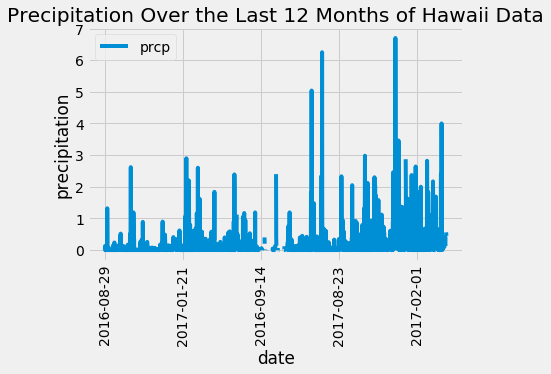

In [125]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# date 2017-08-23
# prcp
# Calculate the date 1 year ago from the last data point in the database
# 10.3.3
# https://docs.sqlalchemy.org/en/13/core/type_basics.html?highlight=timedelta
# https://www.geeksforgeeks.org/python-datetime-timedelta-function/
last_date = dt.datetime(2017, 8, 23)
last_twelve_mos = last_date - dt.timedelta(days = 360)
# Perform a query to retrieve the data and precipitation scores
twelve_mos_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_twelve_mos).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
# precip_df = pd.DataFrame(twelve_mos_precip.date, twelve_mos_precip.prcp)
# inplacebool, default False
# Modify the DataFrame in place (do not create a new object).
precip_df = pd.DataFrame(twelve_mos_precip, columns = ['date', 'prcp'])
precip_sorted_df = precip_df.sort_values(["date"], ascending=True)


precip_df.set_index(precip_df['date'], inplace=True)
# precip_df

# precip_sorted_df
# # pd.read_sql(session.query(twelve_mos_precip))
# # pd.read_sql(session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_twelve_mos).all())
# # # TypeError: read_sql() missing 1 required positional argument: 'con'


# # Sort the dataframe by date

# data_msmt_dates = data.sort_index("date", ascending=False)

# type('date')

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(x='date', y='prcp', rot=90)
plt.title("Precipitation Over the Last 12 Months of Hawaii Data")
plt.xlabel("date")
plt.ylabel("precipitation")

In [126]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pd.DataFrame.describe(precip_df)

,prcp
count,1985.000000
mean,0.172383
std,0.453252
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [33]:
# Design a query to show how many stations are available in this dataset?
query = session.query(Measurement.station.distinct().label("station"))
station_unique = [row.station for row in query.all()]
station_unique

['USC00519397',
 'USC00513117',
 'USC00514830',
 'USC00517948',
 'USC00518838',
 'USC00519523',
 'USC00519281',
 'USC00511918',
 'USC00516128']

In [127]:
session.query(Measurement.station).distinct().count()

9

In [132]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
len(precip_df['station'])

KeyError: 'station'

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
